In [63]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
from tweepy import OAuthHandler

In [64]:
#function to calculate percentage\

def percentage(part,whole):
    return 100*float(part)/float(whole)

In [65]:
# Variables that contain the user credentials to access the Twitter API

ACCESS_TOKEN = "1131115058195382277-M67RczHduduecRuRJIg9AwMBcJSEDI"
ACCESS_TOKEN_SECRET = "ouuxNGvyyY1OdpjQJYRiFNMrlqCBFCFadCTjtnf0NKhv6"
CONSUMER_TOKEN = "6t1pbEjjBCd8dVPwkAUADmxqc"
CONSUMER_TOKEN_SECRET = "GpXXTLyuivfRk0d9WcZikglWlD6tuXhVQf5dnq9XyvAGTfJ2uT"

In [66]:
auth = OAuthHandler(CONSUMER_TOKEN,CONSUMER_TOKEN_SECRET)
    
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
    

In [67]:
api = tweepy.API(auth)

In [85]:
#n = int(input("enter no. of terms to search:"))
searchTerm = input("Enter keyword/hashtag to search:")
search.append(searchTerm)
    
noofSearchterm = int(input("Enter no. of tweets to analyze:"))



Enter keyword/hashtag to search:bjp
Enter no. of tweets to analyze:300


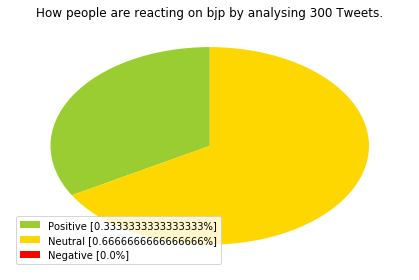

In [86]:

tweets = tweepy.Cursor(api.search,q=searchTerm,lang='English').items(noofSearchterm)
positive = 0
negative = 0 
neutral = 0
polarity = 0
for tweet in tweets:
    #print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    

    if(polarity == 0):
        neutral += 1
    elif(polarity < 0):
        negative +=1
    elif(polarity > 0):
        positive +=1

positive = percentage(positive,noofSearchterm)
negative = percentage(negative,noofSearchterm)
neutral = percentage(neutral,noofSearchterm)

labels = ['Positive ['+str(positive)+'%]','Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]'] 
sizes = [positive, neutral, negative]
colors = ['yellowgreen','gold','red']

patches, texts = plt.pie(sizes,colors=colors,startangle= 90)
plt.legend(patches, labels, loc='best')
plt.title('How people are reacting on '+searchTerm+' by analysing '+str(noofSearchterm)+' Tweets.')
plt.axis=('equal')
plt.tight_layout()
plt.show()


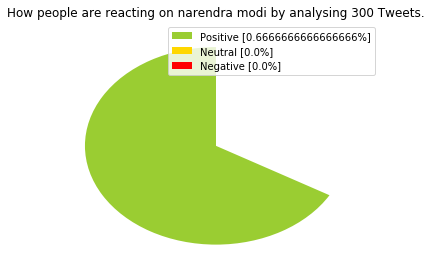